In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

# 1. 读取内置数据集
adata = sc.datasets.pbmc3k()  # 加载 PBMC 3K 数据集

c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import annd

在使用 Scanpy 进行单细胞RNA测序（scRNA-seq）数据分析时，数据预处理是非常关键的一步。`sc.pp.filter_genes` 和 `sc.pp.filter_cells` 是 Scanpy 中用于过滤低表达基因和低表达细胞的函数。下面我将结合生物学相关知识来解释这两行代码的作用：

1. **过滤低表达基因 (`sc.pp.filter_genes(adata, min_cells=3)`)**:

   - **功能**：这行代码的作用是过滤掉那些在至少 `min_cells` 个细胞（这里是3个细胞）中表达水平低于某个阈值（默认为0，但通常通过 `min_counts` 参数设置，如果未设置则默认为表达量大于0）的基因。
   - **生物学意义**：在单细胞RNA测序数据中，很多基因可能在极少数细胞中表达，这些基因可能是噪声或者是非特异性表达。过滤掉这些低表达基因可以减少后续分析的复杂性和噪声，同时提高分析的准确性和可靠性。此外，低表达基因可能不具有生物学上的显著性，因此它们的去除不太可能影响对生物学过程的解释。

2. **过滤低表达细胞 (`sc.pp.filter_cells(adata, min_genes=200)`)**:

   - **功能**：这行代码的作用是过滤掉那些表达基因数量少于 `min_genes`（这里是200个基因）的细胞。
   - **生物学意义**：在单细胞RNA测序实验中，有些细胞可能由于技术原因（如细胞破裂、RNA降解）或生物学原因（如细胞处于静止期或分化状态）而表达很少的基因。这些细胞在后续的分析中可能会引入噪声或偏差。通过过滤掉这些低表达细胞，我们可以提高数据的质量，使得后续的分析更加准确和可靠。此外，低表达细胞可能不代表典型的细胞状态，因此它们的去除有助于更清晰地揭示细胞类型的多样性和功能。

综上所述，这两行代码通过过滤低表达基因和低表达细胞，提高了scRNA-seq数据的质量和可靠性，为后续的分析（如细胞聚类、差异表达分析、细胞类型鉴定等）打下了坚实的基础。这是单细胞RNA测序数据分析中常见的预处理步骤之一。

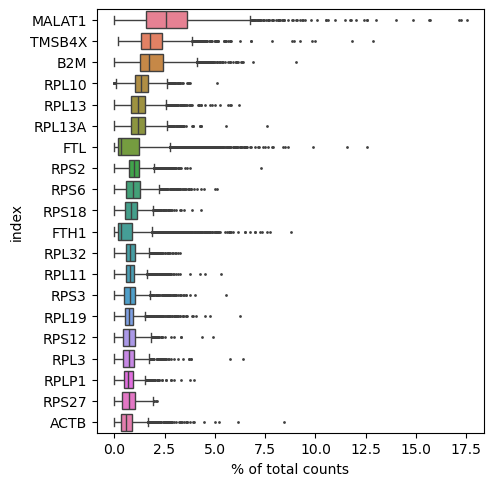

In [2]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [3]:
# 2. 数据预处理
sc.pp.filter_genes(adata, min_cells=3)  # 过滤低表达基因
sc.pp.filter_cells(adata, min_genes=200)  # 过滤低表达细胞

这几行代码是用于计算单细胞RNA测序（scRNA-seq）数据中每个细胞的线粒体基因比例，并根据这个比例过滤掉高线粒体比例的细胞。下面我将结合生物学相关知识来解释这几行代码的作用：

1. **标记线粒体基因 (`adata.var['mt'] = adata.var_names.str.startswith('MT-')`)**:

   - **功能**：这行代码创建了一个新的列 `mt` 在 `adata.var`（即变量或基因注释数据框）中，用于标记哪些基因是线粒体基因。这里使用的是基因名是否以 `'MT-'` 开头作为判断标准。
   - **生物学意义**：线粒体是细胞中的一个重要细胞器，负责能量产生和细胞代谢。在scRNA-seq数据中，线粒体基因的表达水平通常被用作细胞质量的指标之一。高线粒体基因表达可能表明细胞处于应激状态、受损或即将死亡，因此这些细胞可能不适合用于后续的分析。

2. **计算每个细胞的线粒体基因比例 (`adata.obs['percent_mito'] = ...`)**:

   - **功能**：这行代码计算了每个细胞中线粒体基因表达量占该细胞总表达量的百分比，并将结果存储在新的观察值注释列 `percent_mito` 中。
   - **具体计算**：首先，通过 `adata[:, adata.var['mt']]` 选择出所有线粒体基因的表达矩阵；然后，使用 `.X.sum(axis=1)` 计算每个细胞中线粒体基因的总表达量；接着，用总线粒体基因表达量除以该细胞所有基因的总表达量（`adata.X.sum(axis=1)`）；最后，将结果乘以100得到百分比。
   - **生物学意义**：这个比例可以作为细胞质量的指标，高比例可能表明细胞状态不佳或存在技术问题。

3. **过滤高线粒体比例细胞 (`adata = adata[adata.obs['percent_mito'] < 20]`)**:

   - **功能**：这行代码过滤掉了 `percent_mito` 值高于20%的细胞，即保留了线粒体基因比例较低的细胞。
   - **生物学意义**：通过过滤掉高线粒体比例的细胞，可以去除那些可能由于应激、损伤或死亡而导致的异常细胞，从而提高后续分析的准确性和可靠性。通常，根据实验和数据的具体情况，这个阈值（这里是20%）可能会有所调整。

综上所述，这几行代码通过计算和过滤线粒体基因比例，有助于提高scRNA-seq数据的质量和可靠性，为后续的分析提供了更好的基础。这是单细胞RNA测序数据分析中常见的预处理步骤之一。

In [4]:
# 3. 计算线粒体基因比例
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = (adata[:, adata.var['mt']].X.sum(axis=1) / adata.X.sum(axis=1)).A1 * 100
adata = adata[adata.obs['percent_mito'] < 20]  # 过滤高线粒体比例细胞

这几行代码是用于对单细胞RNA测序（scRNA-seq）数据进行标准化的处理步骤。标准化是数据预处理中的一个重要环节，它可以消除不同细胞之间由于测序深度、细胞大小或RNA含量差异等原因导致的表达量差异，从而使得后续的分析更加准确和可靠。下面我将结合生物学相关知识来解释这几行代码的作用：

1. **标准化总表达量 (`sc.pp.normalize_total(adata, target_sum=1e4)`)**:

   - **功能**：这行代码使用 `normalize_total` 函数对 `adata` 对象中的表达矩阵进行标准化，使得每个细胞的总表达量（即所有基因的表达量之和）都等于 `target_sum` 指定的值（这里是10,000）。
   - **生物学意义**：在scRNA-seq实验中，不同细胞之间的RNA含量和测序深度可能存在差异，这会导致表达矩阵中不同细胞的总表达量不同。这种差异可能会掩盖真实的生物学变异，因此需要对数据进行标准化以消除这种影响。通过将所有细胞的总表达量标准化到相同的值，可以使得不同细胞之间的表达水平具有可比性。

2. **对数变换 (`sc.pp.log1p(adata)`)**:

   - **功能**：这行代码使用 `log1p` 函数对标准化后的表达矩阵进行对数变换，即对每个表达值加1后取对数（以自然数为底）。
   - **生物学意义**：对数变换是基因表达数据分析中常用的一种数据转换方式。它可以使得数据更加接近正态分布，减小极端值的影响，并且使得不同数量级的表达值在可视化时更加清晰。在scRNA-seq数据中，对数变换可以帮助我们更好地观察低表达基因的变化，同时减小高表达基因对整体数据分布的影响。此外，对数变换还可以使得后续的差异表达分析等统计测试更加稳定和可靠。

综上所述，这几行代码通过对scRNA-seq数据进行标准化和对数变换，消除了不同细胞之间的表达量差异，使得数据更加具有可比性和可分析性。这是单细胞RNA测序数据分析中常见的预处理步骤之一，为后续的分析提供了更好的基础。通过这些处理步骤，我们可以更加准确地揭示细胞类型的多样性、功能以及基因表达调控的机制。

In [5]:
# 4. 标准化数据
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


这行代码是用于识别单细胞RNA测序（scRNA-seq）数据中的高度变异基因（Highly Variable Genes, HVGs）。识别HVGs是单细胞转录组学分析中的一个重要步骤，因为这些基因通常与细胞类型的特异性、细胞状态的变化或生物学过程的动态性密切相关。下面我将结合生物学相关知识来解释这行代码的作用：

`sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)`

- **功能**：这行代码使用Scanpy库中的`highly_variable_genes`函数来识别`adata`对象中高度变异的基因。函数会根据基因的平均表达量（`mean`）和离散度（`dispersion`，即表达量的变异性）来筛选基因。

- **参数解释**：
  - `min_mean`：指定基因平均表达量的最小值，这里设置为0.0125。这个参数用于过滤掉那些表达量极低的基因，因为它们的变异性可能主要是由于测序噪声造成的。
  - `max_mean`：指定基因平均表达量的最大值，这里设置为3。这个参数用于过滤掉那些表达量极高的基因，因为它们的高表达可能掩盖了其他基因的变异性。
  - `min_disp`：指定基因离散度的最小值，这里设置为0.5。离散度是衡量基因表达量变异性的一个指标，高离散度意味着该基因在不同细胞之间的表达量差异较大。

- **生物学意义**：
  - **高度变异基因**：在单细胞水平上，某些基因的表达量会在不同细胞之间呈现出较大的差异。这些差异可能是由于细胞类型的不同、细胞状态的变化、基因调控的差异或环境因素的影响等造成的。识别这些高度变异的基因有助于我们深入了解细胞间的异质性和生物学过程的动态性。
  - **参数设置**：通过设置`min_mean`和`max_mean`参数，我们可以筛选出那些表达量适中且在不同细胞之间具有显著变异性的基因。这些基因更有可能代表真正的生物学变异，而不是由于测序噪声或高表达量掩盖的变异。同时，`min_disp`参数的设置确保了我们只关注那些离散度较高的基因，即那些在不同细胞之间表达量差异较大的基因。

综上所述，这行代码通过识别高度变异基因，为我们提供了深入了解单细胞转录组学数据的一个重要视角。这些基因可能与细胞类型的特异性、细胞状态的变化或生物学过程的动态性密切相关，因此是后续分析中重点关注的对象。

In [6]:
# 5. 识别高度变异基因
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [7]:
# 6. 数据缩放
adata = adata[:, adata.var['highly_variable']]  # 仅使用高变基因
sc.pp.scale(adata, max_value=10)

c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\preprocessing\_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
# 7. PCA降维
sc.tl.pca(adata, svd_solver='arpack')

In [9]:
# 8. 计算邻接图
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# 9. 聚类分析
sc.tl.leiden(adata)

C:\Users\xuelx\AppData\Local\Temp\ipykernel_14680\89803333.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


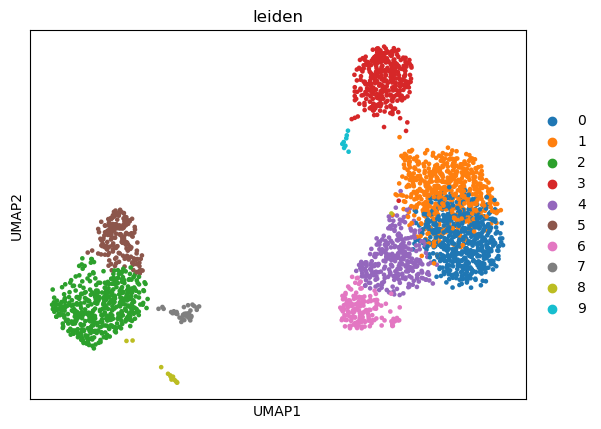

In [11]:
# 10. 可视化结果
sc.tl.umap(adata)
sc.pl.umap(adata, color='leiden')

ranking genes
    finished (0:00:00)


c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\

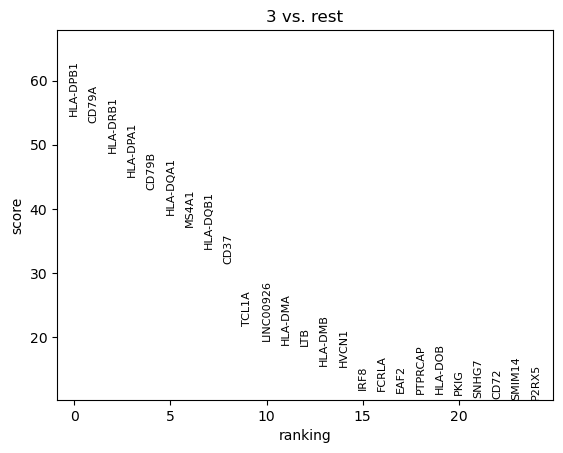

In [21]:
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, groups=["3"])

ranking genes
    finished (0:00:00)


c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\.conda\envs\bioinfo\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\xuelx\

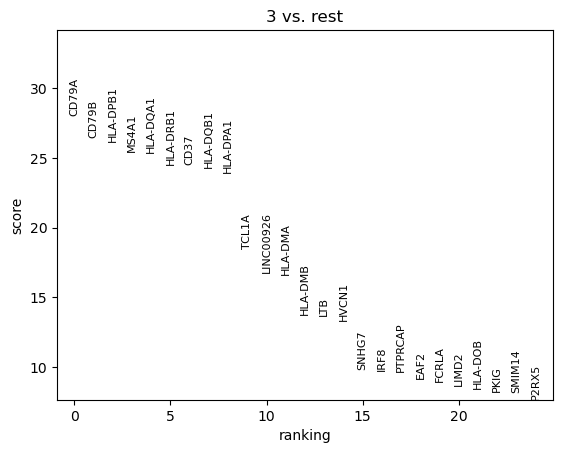

In [22]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, groups=["3"])

ranking genes
    finished (0:00:00)


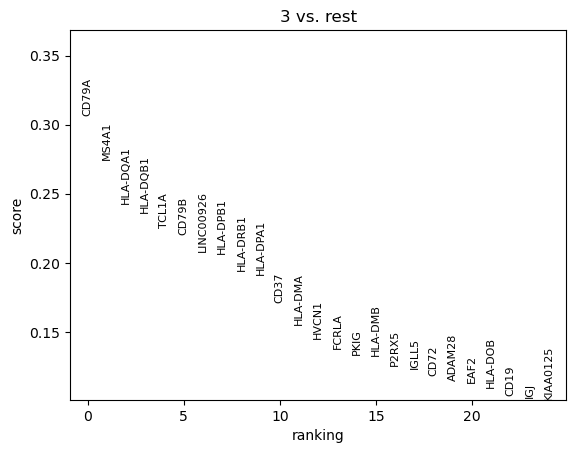

In [23]:
sc.tl.rank_genes_groups(adata, "leiden", method="logreg", max_iter=1000)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, groups=["3"])

In [15]:
print(adata)
print(adata.obs)

AnnData object with n_obs × n_vars = 2698 × 1865
    obs: 'n_genes', 'percent_mito', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
                  n_genes  percent_mito leiden
index                                         
AAACATACAACCAC-1      779      3.017776      1
AAACATTGAGCTAC-1     1352      3.793596      3
AAACATTGATCAGC-1     1129      0.889736      0
AAACCGTGCTTCCG-1      960      1.743085      5
AAACCGTGTATGCG-1      521      1.224490      6
...                   ...           ...    ...
TTTCGAACTCTCAT-1     1153      2.110436      2
TTTCTACTGAGGCA-1     1224      0.929422      3
TTTCTACTTCCTCG-1      622      2.197150      3
TTTGCATGAGAGGC-1      452      2.054795      3
TTTGCATGCCTCAC-1      723      0.806452    

In [16]:
B_cells = adata[adata.obs['leiden'] == '3']
print(B_cells)

View of AnnData object with n_obs × n_vars = 346 × 1865
    obs: 'n_genes', 'percent_mito', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [17]:
gene_names = ['CD79A', 'HLA-DPB1', 'MS4A1']
gene_name = gene_names[0]
gene_index = adata.var_names.get_loc(gene_name)
gene_expression = adata.X[:, gene_index]
vec = np.expm1(gene_expression)
vec = np.ceil(vec).astype(int)
unique_values, counts = np.unique(vec, return_counts=True)
print(unique_values)
print(counts)  

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  28  29  30  31  32  33  35  38  40
  43  78  81  99 140 187]
[2272    9   35   43   26   22   22   23   22   16   22   21   11   17
    9   10   20    7   18   15   11    8    5    3    7    1    4    1
    2    1    3    2    1    1    1    1    1    1    1    1    1    1]


In [26]:
results = {}
max_value = 50
for gene_name in gene_names:
    gene_index = adata.var_names.get_loc(gene_name)
    gene_expression = adata.X[:, gene_index]
    vec = np.expm1(gene_expression)
    vec = np.ceil(vec).astype(int)
    unique_values, counts = np.unique(vec, return_counts=True)
    res_vec = []
    for i in range(max_value):
        if i in unique_values:
            inx = np.where(unique_values == i)[0]
            res_vec.append(int(counts[inx]))
        else:
            res_vec.append(0)
    summax = 0
    for i in range(len(unique_values)):
        if unique_values[i] >= max_value:
            summax += counts[i]
    res_vec.append(summax)
    s = sum(res_vec)
    nor_res_vec = [(v+0.0)/s for v in res_vec]
    results[gene_name] = nor_res_vec
    
print(results)

{'CD79A': [0.8421052631578947, 0.003335804299481097, 0.012972572275759823, 0.015937731653076354, 0.009636767976278725, 0.00815418828762046, 0.00815418828762046, 0.008524833209785025, 0.00815418828762046, 0.005930318754633061, 0.00815418828762046, 0.007783543365455893, 0.00407709414381023, 0.006300963676797628, 0.003335804299481097, 0.0037064492216456633, 0.007412898443291327, 0.0025945144551519643, 0.006671608598962194, 0.005559673832468495, 0.00407709414381023, 0.0029651593773165306, 0.0018532246108228317, 0.001111934766493699, 0.0025945144551519643, 0.00037064492216456633, 0.0014825796886582653, 0.0, 0.00037064492216456633, 0.0007412898443291327, 0.00037064492216456633, 0.001111934766493699, 0.0007412898443291327, 0.00037064492216456633, 0.0, 0.00037064492216456633, 0.0, 0.0, 0.00037064492216456633, 0.0, 0.00037064492216456633, 0.0, 0.0, 0.00037064492216456633, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018532246108228317], 'HLA-DPB1': [0.5011119347664937, 0.20533728687916974, 0.09710896960711

C:\Users\xuelx\AppData\Local\Temp\ipykernel_14680\2523479620.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res_vec.append(int(counts[inx]))


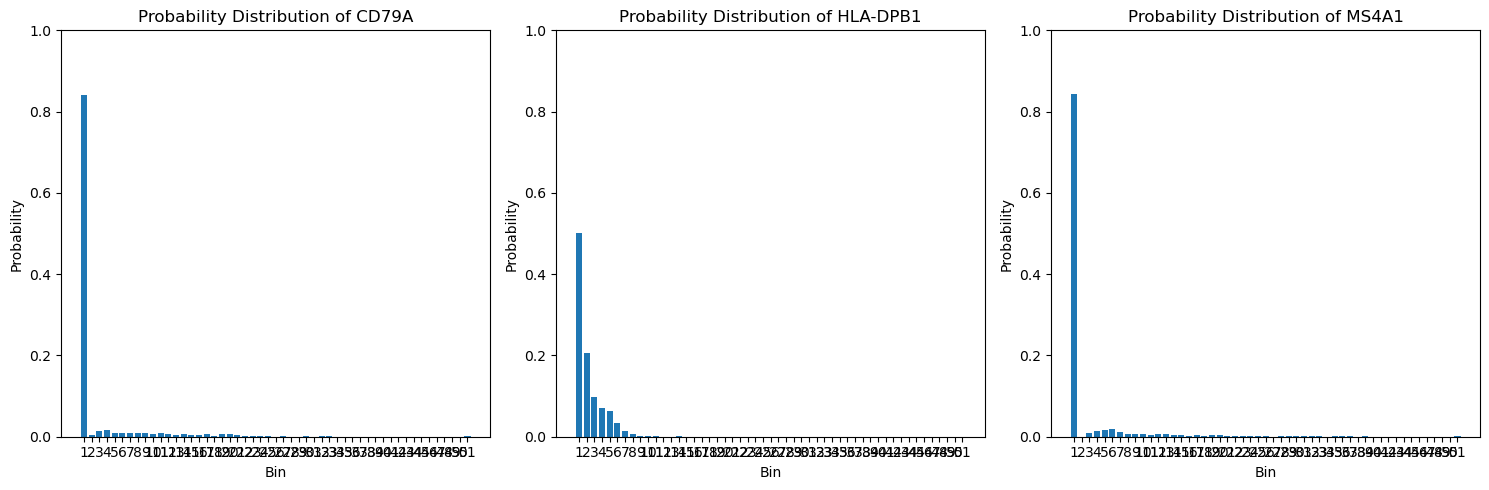

In [27]:
import matplotlib.pyplot as plt

# 创建一个包含三个子图的图形
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 遍历 results 字典，并在每个子图上绘制概率分布
for i, (gene, probs) in enumerate(results.items()):
    axs[i].bar(range(len(probs)), probs, tick_label=range(1, len(probs)+1))
    axs[i].set_title(f'Probability Distribution of {gene}')
    axs[i].set_xlabel('Bin')
    axs[i].set_ylabel('Probability')
    axs[i].set_ylim(0, 1)  # 设置y轴的范围为0到1

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

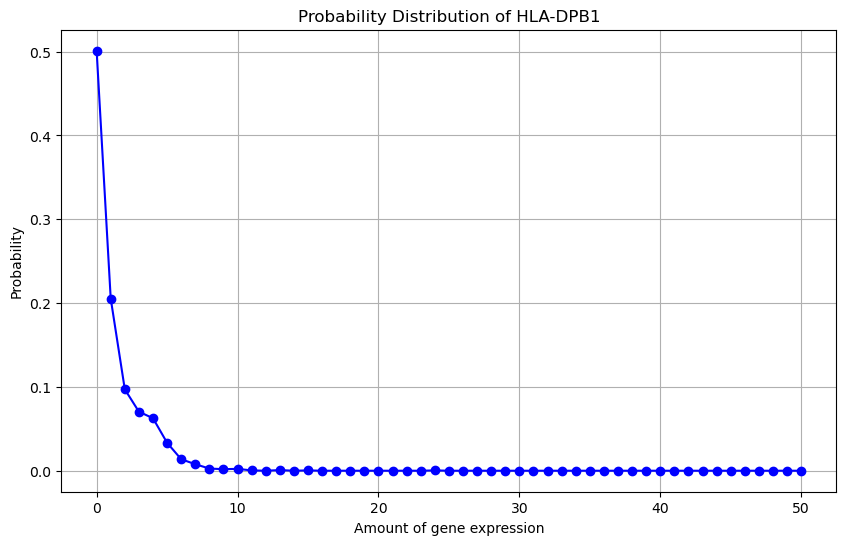

In [29]:
prob = results["HLA-DPB1"]
 
# x轴的索引，这里使用range函数生成从0开始的索引
x = range(len(prob))
 
# 创建一个图形
plt.figure(figsize=(10, 6))
 
# 绘制折线图
plt.plot(x, prob, marker='o', linestyle='-', color='b')
 
# 设置标题和标签
plt.title('Probability Distribution of HLA-DPB1')
plt.xlabel('Amount of gene expression')
plt.ylabel('Probability')
 
# 显示网格
plt.grid(True)
 
# 显示图表
plt.show()